# Clasificaci√≥n de Congesti√≥n en Redes SDN usando Machine Learning
Este notebook contiene el flujo completo de carga, preprocesamiento, an√°lisis y modelado de datos para clasificar niveles de congesti√≥n en redes definidas por software (SDN).

#Carga de Datos üìÅ

Se cargan los datasets necesarios para el an√°lisis.

### Subir archivos

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dataset_f_con.csv to dataset_f_con.csv


### Cargar archivos con pandas

Cambiar libreria de scikit learn para comptabilidad con el controlador SDN

In [1]:
pip install scikit-learn==1.3.2

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 61.0/61.0 kB 2.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10.9/10.9 MB 70.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 18.3/18.3 MB 73.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
umap-learn 0.5.9.post2 

In [ ]:
import pandas as pd
# Definir nombres de las columnas seg√∫n la estructura de la base de datos
column_names = ["timestamp", "dpid", "port", "throughput_mbps", "utilization_pct",
                "avg_pkt_size_rx", "avg_pkt_size_tx", "throughput_jitter", "delay",
                "jitter", "d_utilization", "d_throughput", "tx_bytes", "rx_bytes", "test_scenario"]

df1 = pd.read_csv('dataset_f_con.csv',names=column_names)

df1.head()

timestamp             dpid  port  throughput_mbps  utilization_pct  \
1  1.741499e+09   63993884303947     2          22.3271          3.66019   
2  1.741499e+09   63993884303947     3          22.6547          3.71388   
3  1.741499e+09  222777563905866     1          21.9322          3.59545   
4  1.741499e+09  222777563905866     3          21.9313          3.59529   
5  1.741499e+09  222777563905866     1          21.8979          3.58981   

   avg_pkt_size_rx  avg_pkt_size_tx  throughput_jitter     delay    jitter  \
1        1506.2400          65.9956            8.33590 -1.000000 -1.000000   
2          65.9956        1505.5600            8.46736  0.008530  0.000095   
3        1504.7600          65.9956            8.19541  0.007148  0.002073   
4          66.0000        1505.5600            8.19521 -1.000000 -1.000000   
5        1506.3500          65.9901           10.01040  0.052477  0.045329   

   d_utilization  d_throughput    tx_bytes    rx_bytes   test_scenario  
1        3.26892     19.940400   173749061  8507780120  Sin-Congestion  
2        3.37568     20.591700  8507811142   173747679  Sin-Congestion  
3        3.15322     19.234600   173747679  8507810170  Sin-Congestion  
4        3.15315     19.234200  7853032217   159806303  Sin-Congestion  
5       -0.00583     -0.035564   173787603  8510414652  Sin-Congestion

## üîç Exploraci√≥n Inicial de Datos

Visualizamos los escenarios de congesti√≥n en el dataset.

In [ ]:
df1['test_scenario'].value_counts()

test_scenario
Congestion Progresiva-TREE    11662
Sin Congestion-TREE            4352
Congestion-Progresiva          3889
Congestion Moderada-TREE       2914
Congestion Severa-TREE         2180
Sin-Congestion                 1443
Congestion-Moderada             976
Congestion-Severa               728
Name: count, dtype: int64

### Definir escenarios de congesti√≥n

In [ ]:
import pandas as pd
# Definir los escenarios de congesti√≥n excluyendo 'Congestion Progresiva'
scenarios = [
    "Sin Congestion-TREE", "Sin-Congestion",
    "Congestion Moderada-TREE", "Congestion-Moderada",
    "Congestion Severa-TREE", "Congestion-Severa"
]

# Filtrar filas con delay -1 (casos host-switch)
df1 = df1[df1["delay"] != -1]
# Filtrar solo los escenarios seleccionados
df_filtered = df1[df1["test_scenario"].isin(scenarios)]
# **Seleccionar solo ciertas m√©tricas para an√°lisis**
selected_metrics = ["utilization_pct", "delay", "jitter", "throughput_jitter"]
# Estad√≠sticas descriptivas
stats = df_filtered.groupby("test_scenario")[selected_metrics].agg(['mean', 'std', 'min', 'max'])
stats



utilization_pct                                \
                                    mean        std      min       max   
test_scenario                                                            
Congestion Moderada-TREE       82.939033  10.882020  3.13246  100.0000   
Congestion Severa-TREE         93.643292  10.187948  5.87932  100.0000   
Congestion-Moderada            81.975819  10.916630  3.69360  100.0000   
Congestion-Severa              97.310599   9.841650  7.46523  100.0000   
Sin Congestion-TREE            28.023583  19.883467  3.01194   66.2382   
Sin-Congestion                 28.187535  19.806018  3.06457   63.1466   

                             delay                                  jitter  \
                              mean       std       min       max      mean   
test_scenario                                                                
Congestion Moderada-TREE  0.071475  0.039995  0.002487  0.382925  0.023611   
Congestion Severa-TREE    0.070121  0.031396  0.002172  0.321720  0.020219   
Congestion-Moderada       0.049237  0.022041  0.005852  0.247297  0.014972   
Congestion-Severa         0.058117  0.034366  0.001451  0.366178  0.019830   
Sin Congestion-TREE       0.061441  0.026269  0.002075  0.275905  0.015057   
Sin-Congestion            0.048552  0.019383  0.002342  0.226332  0.012454   

                                                           throughput_jitter  \
                               std           min       max              mean   
test_scenario                                                                  
Congestion Moderada-TREE  0.045255  1.907350e-06  0.335266         56.385663   
Congestion Severa-TREE    0.034203  7.152560e-07  0.279566         75.871310   
Congestion-Moderada       0.025162  6.437300e-06  0.193359         54.625948   
Congestion-Severa         0.040586  9.298320e-06  0.316855         71.216416   
Sin Congestion-TREE       0.028921  5.245210e-06  0.226924         17.004934   
Sin-Congestion            0.023485  1.144410e-05  0.198464         15.404763   

                                                        
                                std       min      max  
test_scenario                                           
Congestion Moderada-TREE  75.486554  2.969720  273.714  
Congestion Severa-TREE    83.565618  7.213670  325.610  
Congestion-Moderada       75.557576  4.807100  242.064  
Congestion-Severa         93.154522  7.556480  347.267  
Sin Congestion-TREE       32.180790  0.306654  176.373  
Sin-Congestion            30.724789  0.264395  156.669

### Etiquetado de Congesti√≥n

In [ ]:
# Definir funci√≥n para etiquetar cada fila seg√∫n los umbrales establecidos
def label_congestion(fila):
    if fila["delay"] == -1:  # Eliminar datos no medidos entre switches
        return -1

    # Umbrales (percentiles ajustados)
    UMBRAL_UTIL_SIN = 63.15  # Max Sin-Congestion
    UMBRAL_UTIL_SEV = 90.00  # Promedio Congestion-Severa: 97.31
    UMBRAL_DELAY = 0.23      # Max Sin-Congestion
    UMBRAL_JITTER = 0.20     # Max Congestion-Moderada
    UMBRAL_THR_JITTER = 156.67  # Max Sin-Congestion

    # L√≥gica de decisi√≥n
    if (fila['utilization_pct'] <= UMBRAL_UTIL_SIN and
        fila['delay'] <= UMBRAL_DELAY and
        fila['jitter'] <= UMBRAL_JITTER and
        fila['throughput_jitter'] <= UMBRAL_THR_JITTER):
        return 0  # Sin congesti√≥n

    else:
        return 1  # Fusionamos moderada con severa como "Congesti√≥n"
    """
    #Opcion mezclar
    # Umbrales (percentiles ajustados)
    UMBRAL_UTIL_SIN = 63.15  # Max Sin-Congestion
    UMBRAL_UTIL_SEV = 90.00  # Promedio Congestion-Severa: 97.31
    UMBRAL_DELAY = 0.23      # Max Sin-Congestion
    UMBRAL_JITTER = 0.20     # Max Congestion-Moderada
    UMBRAL_THR_JITTER = 156.67  # Max Sin-Congestion

    # L√≥gica de decisi√≥n
    if (fila['utilization_pct'] <= UMBRAL_UTIL_SIN and
        fila['delay'] <= UMBRAL_DELAY and
        fila['jitter'] <= UMBRAL_JITTER and
        fila['throughput_jitter'] <= UMBRAL_THR_JITTER):
        return 0  # Sin congesti√≥n

    elif (fila['utilization_pct'] > UMBRAL_UTIL_SEV or
          fila['delay'] > 0.35 or  # 90% percentil Congestion-Severa
          fila['jitter'] > 0.30 or
          fila['throughput_jitter'] > 300):
        return 1  # Congesti√≥n

    else:
        return 0  # Fusionamos la clase moderada con "No congesti√≥n"
"""
# Aplicar la funci√≥n al dataset
df1["label"] = df1.apply(label_congestion, axis=1)
# Verificar si "label" est√° en el dataset
if "label" in df1.columns:
    df3 = df1[selected_metrics + ["label"]].copy()
else:
    df3 = df1[selected_metrics].copy()


df3.agg(['min','max'])

utilization_pct     delay        jitter  throughput_jitter  label
min          3.00692  0.001451  4.768370e-07           0.194651      0
max        100.00000  0.450061  3.924450e-01         347.267000      1



```
# Tiene formato de c√≥digo
```

## ‚öôÔ∏è Preprocesamiento y entranamiento de Datos

Incluye normalizaci√≥n, tratamiento de valores nulos, y separaci√≥n de caracter√≠sticas.

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

# **Seleccionar solo ciertas m√©tricas para an√°lisis**
selected_metrics = ["utilization_pct", "delay", "jitter", "throughput_jitter"]

def inspeccion_datos(df):
    """Muestra las primeras filas y la informaci√≥n del dataframe."""
    print("Primeras filas del dataset:")
    print(df.head())
    print("\nInformaci√≥n del dataset:")
    print(df.info())
    print("\nEstad√≠sticas descriptivas del dataset:")
    print(df.describe())

def manejar_valores_nulos_y_infinitos(df):
    """Reemplaza valores nulos e infinitos en el DataFrame."""
    # Reemplazar infinitos con NaN
    df.replace([float('inf'), float('-inf')], pd.NA, inplace=True)

    # Imputar valores nulos con la media
    imputer = SimpleImputer(strategy='mean')
    df[selected_metrics] = imputer.fit_transform(df[selected_metrics])

    return df

def normalize_data(df, columns):
    """Normaliza las columnas especificadas usando MinMaxScaler."""
    scaler = MinMaxScaler(feature_range=(0, 1))
    df[columns] = scaler.fit_transform(df[columns])
    return df, scaler

def preprocess_data(df):
    """Realiza el preprocesamiento completo del DataFrame."""
    print("Iniciando preprocesamiento de datos...")

    # Manejar valores nulos e infinitos
    df2 = manejar_valores_nulos_y_infinitos(df)

    # Normalizar las columnas seleccionadas y obtener el escalador
    df2, scaler = normalize_data(df, selected_metrics)

    print("Preprocesamiento completado.")
    return df2, scaler



In [ ]:
df_new,scaler=preprocess_data(df3)
# Coloque los __DataFrames__ de lado a lado
df3.describe()

Iniciando preprocesamiento de datos...
Preprocesamiento completado.


utilization_pct         delay        jitter  throughput_jitter  \
count     14072.000000  14072.000000  14072.000000       14072.000000   
mean          0.612752      0.138345      0.046847           0.131408   
std           0.329335      0.070649      0.088442           0.196198   
min           0.000000      0.000000      0.000000           0.000000   
25%           0.329684      0.102076      0.007944           0.020054   
50%           0.718005      0.125684      0.018282           0.048836   
75%           0.896041      0.164170      0.047225           0.145520   
max           1.000000      1.000000      1.000000           1.000000   

              label  
count  14072.000000  
mean       0.558485  
std        0.496585  
min        0.000000  
25%        0.000000  
50%        1.000000  
75%        1.000000  
max        1.000000

In [ ]:
df3.headd()

utilization_pct     delay    jitter  throughput_jitter  label
2          0.007289  0.015780  0.000241           0.023836      0
3          0.006068  0.012700  0.005281           0.023052      0
5          0.006010  0.113742  0.115502           0.028282      0
8          0.003741  0.115139  0.113577           0.027915      0
10         0.005662  0.110219  0.005623           0.030206      0

In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from sklearn.model_selection import train_test_split
import sys

from collections import Counter

def balancear_clases(X, y, metodo):
    """
    Aplica oversampling, undersampling o una combinaci√≥n (SMOTE + Tomek) seg√∫n el m√©todo seleccionado.

    Par√°metros:
        - X: Caracter√≠sticas del dataset.
        - y: Etiqueta de clasificaci√≥n.
        - metodo: "oversampling", "undersampling" o "smote_tomek".

    Retorna:
        - X_resampled, y_resampled: Dataset balanceado.
    """
    print("\nDistribuci√≥n previa a balanceo:")
    print(y.value_counts())
    if metodo == "oversampling":
        sampler = RandomOverSampler(random_state=42)
        print("\nüîπ Aplicando **Oversampling**...")
    elif metodo == "undersampling":
        sampler = RandomUnderSampler(random_state=42)
        print("\nüîπ Aplicando **Undersampling**...")
    elif metodo == "smote_tomek":
        print("\nüîπ Aplicando **SMOTE + Tomek Links**...")

        # Aplicar SMOTE primero
        smote = SMOTE(random_state=42)
        X_smote, y_smote = smote.fit_resample(X, y)
        print(f"üìä **Despu√©s de SMOTE:** {Counter(y_smote)}")

        # Aplicar Tomek Links
        tomek = TomekLinks()
        X_resampled, y_resampled = tomek.fit_resample(X_smote, y_smote)
        print(f"üìä **Despu√©s de Tomek Links:** {Counter(y_resampled)}")

        # Verificar si a√∫n hay al menos dos clases despu√©s del balanceo
        if len(set(y_resampled)) < 2:
            print("‚ö† **Advertencia:** Solo queda una clase despu√©s del balanceo. Revisa la estrategia.")
            return X, y  # Devuelve los datos originales

        return X_resampled, y_resampled

    else:
        raise ValueError("M√©todo inv√°lido. Usa 'oversampling', 'undersampling' o 'smote_tomek'.")

    # Aplicar balanceo
    X_resampled, y_resampled = sampler.fit_resample(X, y)
    print(f"üìä **Distribuci√≥n despu√©s del balanceo:** {Counter(y_resampled)}")

    # Verificar si a√∫n hay al menos dos clases despu√©s del balanceo
    if len(set(y_resampled)) < 2:
        print("**Advertencia:** Solo queda una clase despu√©s del balanceo. Revisa la estrategia.")
        return X, y  # Devuelve los datos originales

    return X_resampled, y_resampled

# Paso 6: Dividir el dataset en caracter√≠sticas (X) y etiquetas (y)
def dividir_datos(df, columna_etiqueta,metodo_balanceo):
    """
    Divide el dataset en caracter√≠sticas (X) y etiquetas (y) y aplica oversampling.
    """
    X = df.drop(columns=[columna_etiqueta])  # Caracter√≠sticas (sin la columna de la etiqueta)
    y = df[columna_etiqueta]  # Etiqueta

    # Mostrar distribuci√≥n antes del oversampling
    #    print("Distribuci√≥n previa a oversampling:")
    #print(y.value_counts())

    X_resampled,y_resampled=balancear_clases(X,y,metodo_balanceo)

    # Mostrar distribuci√≥n despu√©s del oversampling
    #print("Distribuci√≥n despu√©s de oversampling:")
    #print(y_resampled.value_counts())

    return X_resampled, y_resampled

# Paso 7: Dividir en conjuntos de entrenamiento y prueba
def dividir_entrenamiento_y_prueba(X, y, test_size=0.2):
    """
    Divide el dataset en conjunto de entrenamiento y conjunto de prueba.
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)
    print(f"Tama√±o de X_train: {X_train.shape}")
    print(f"Tama√±o de X_test: {X_test.shape}")
    return X_train, X_test, y_train, y_test


def DIVISION(dataframeprep,columna_etiqueta,metodo):
    # Dividir en caracter√≠sticas (X) y etiquetas (y)
    X,y= dividir_datos(dataframeprep, columna_etiqueta,metodo)
    # Dividir en entrenamiento y prueba
    X_train, X_test, y_train, y_test = dividir_entrenamiento_y_prueba(X, y)

    return X_train, X_test, y_train, y_test


**Division de datos entrenamiento/testeo**

In [ ]:
df3.head()
columna_etiqueta = "label"
X_train, X_test, y_train, y_test=DIVISION(df3,columna_etiqueta,"smote_tomek")
#warnings.filterwarnings("ignore", category=FutureWarning)


Distribuci√≥n previa a balanceo:
label
1    7859
0    6213
Name: count, dtype: int64

üîπ Aplicando **SMOTE + Tomek Links**...
üìä **Despu√©s de SMOTE:** Counter({0: 7859, 1: 7859})
üìä **Despu√©s de Tomek Links:** Counter({0: 7859, 1: 7852})
Tama√±o de X_train: (12568, 4)
Tama√±o de X_test: (3143, 4)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def entrenar_random_forest_con_grid_search(X_train, y_train):
    """
    Entrena un modelo de Random Forest utilizando GridSearch para optimizar los hiperpar√°metros.

    Args:
        X_train: Caracter√≠sticas del conjunto de entrenamiento.
        y_train: Etiquetas del conjunto de entrenamiento.

    Returns:
        Mejor modelo entrenado y resultados de GridSearch.
    """
    # Definir el rango de hiperpar√°metros para GridSearch
    param_grid = {
        'n_estimators': [50, 100, 150],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'class_weight': ['balanced']
    }

    print("Buscando los mejores hiperpar√°metros con GridSearch...")
    rf = RandomForestClassifier(random_state=42)
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, verbose=2, n_jobs=1)
    grid_search.fit(X_train, y_train)

    print("Mejores hiperpar√°metros encontrados:")
    print(grid_search.best_params_)
    print("Entrenamiento Completado :D")
    print("Vuelva Pronto :D")

    return grid_search.best_estimator_, grid_search


"""
Entrena y eval√∫a un modelo de Random Forest utilizando GridSearch para optimizaci√≥n de hiperpar√°metros.
"""
print("Entrenando el modelo Random Forest con GridSearch...")
modelo, grid_search = entrenar_random_forest_con_grid_search(X_train, y_train)


Entrenando el modelo Random Forest con GridSearch...
Buscando los mejores hiperpar√°metros con GridSearch...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END class_weight=balanced, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END class_weight=balanced, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END class_weight=balanced, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END class_weight=balanced, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END class_weight=balanced, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END class_weight=balanced, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.1s
[CV] END class_weight=balanced, max_depth=None, min_samples_leaf=1, min_sample

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Entrenar el modelo con mejores hiperparametros
#{'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}

def entrenar_random_forest(X_train, y_train):
    """
    Entrena un modelo de Random Forest con los datos de entrenamiento.

    Par√°metros:
        - X_train: Caracter√≠sticas del conjunto de entrenamiento.
        - y_train: Etiquetas del conjunto de entrenamiento.
        - n_estimators: N√∫mero de √°rboles en el bosque (por defecto 100).
        - max_depth: Profundidad m√°xima de los √°rboles (None para sin l√≠mite).
    """
    modelo = RandomForestClassifier(
    class_weight='balanced',
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=100,
    random_state=42
    )
    modelo.fit(X_train, y_train)
    print("Entrenamiento Completado :D")
    print("Vuelva Pronto :D")
    return modelo
# Main
def main_random_forest(X_train, X_test, y_train, y_test):
    """
    Entrena y eval√∫a un modelo de Random Forest.
    """
    print("Entrenando el modelo Random Forest...")
    modelo = entrenar_random_forest(X_train, y_train)
    return modelo
# Llamada al flujo
modelo=main_random_forest(X_train, X_test, y_train, y_test)

Entrenando el modelo Random Forest...
Entrenamiento Completado :D
Vuelva Pronto :D


**Evaluacion del Modelo Random Forest**

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
def evaluar_modelo(modelo, X_test, y_test):
    """
    Eval√∫a el modelo y muestra resultados.
    """
    print("Evaluando el modelo...")
    y_pred = modelo.predict(X_test)

    # Reporte de m√©tricas
    print("\nAccuracy:", accuracy_score(y_test, y_pred))
    print("\nReporte de Clasificaci√≥n:")
    print(classification_report(y_test, y_pred))

    # Matriz de confusi√≥n
    print("\nMatriz de Confusi√≥n:")
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Congestion", "Congestion"],
                yticklabels=["No Congestion", "Congestion"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Matriz de Confusi√≥n")
    plt.show()

Evaluando el modelo...

Accuracy: 1.0

Reporte de Clasificaci√≥n:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1572
           1       1.00      1.00      1.00      1571

    accuracy                           1.00      3143
   macro avg       1.00      1.00      1.00      3143
weighted avg       1.00      1.00      1.00      3143


Matriz de Confusi√≥n:


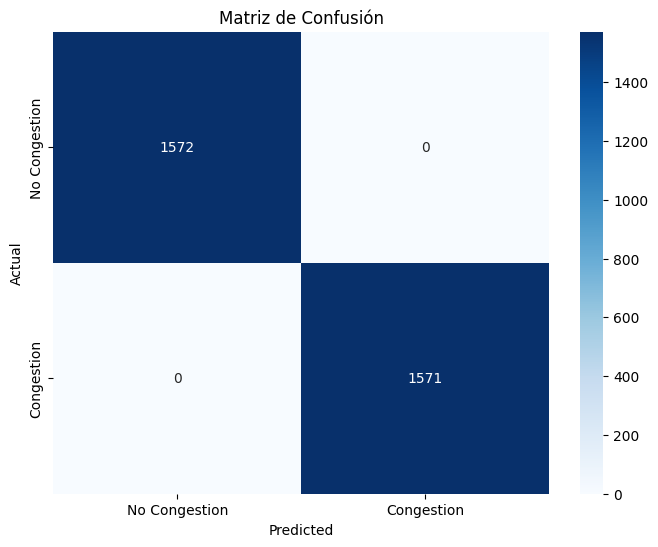

In [ ]:
evaluar_modelo(modelo,X_test,y_test)


--- Conjunto de Entrenamiento ---
Accuracy en entrenamiento: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6287
           1       1.00      1.00      1.00      6281

    accuracy                           1.00     12568
   macro avg       1.00      1.00      1.00     12568
weighted avg       1.00      1.00      1.00     12568


--- Conjunto de Prueba ---
Accuracy en prueba: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1572
           1       1.00      1.00      1.00      1571

    accuracy                           1.00      3143
   macro avg       1.00      1.00      1.00      3143
weighted avg       1.00      1.00      1.00      3143


--- Resumen ---
Diferencia entre entrenamiento y prueba: 0.00%


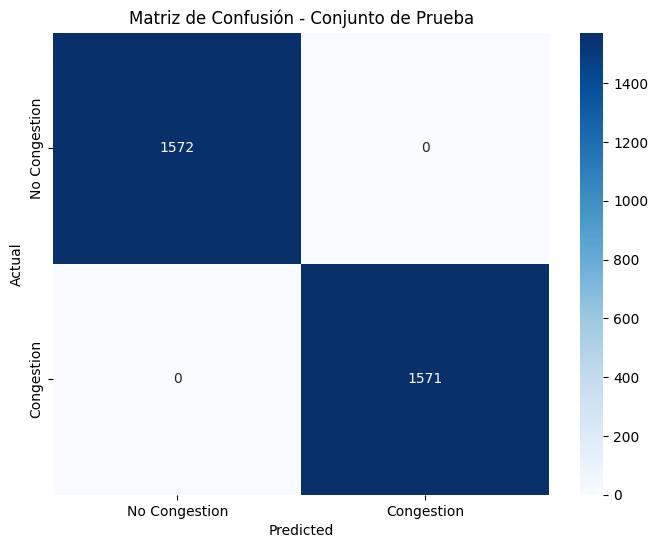

In [ ]:
def evaluar_sobreentrenamiento(modelo, X_train, y_train, X_test, y_test):
    """
    Eval√∫a el modelo en entrenamiento y prueba para detectar sobreentrenamiento.

    Args:
        modelo: Modelo entrenado.
        X_train, y_train: Conjunto de entrenamiento.
        X_test, y_test: Conjunto de prueba.
    """
    # Evaluar en el conjunto de entrenamiento
    y_train_pred = modelo.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    print("\n--- Conjunto de Entrenamiento ---")
    print(f"Accuracy en entrenamiento: {train_accuracy}")
    print(classification_report(y_train, y_train_pred))

    # Evaluar en el conjunto de prueba
    y_test_pred = modelo.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print("\n--- Conjunto de Prueba ---")
    print(f"Accuracy en prueba: {test_accuracy}")
    print(classification_report(y_test, y_test_pred))

    # Comparar los resultados
    print("\n--- Resumen ---")
    print(f"Diferencia entre entrenamiento y prueba: {train_accuracy - test_accuracy:.2%}")

    # Visualizar matriz de confusi√≥n en prueba
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Congestion", "Congestion"],
                yticklabels=["No Congestion", "Congestion"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Matriz de Confusi√≥n - Conjunto de Prueba")
    plt.show()
evaluar_sobreentrenamiento(modelo, X_train, y_train, X_test, y_test)

***Comparacion con Modelo KNN***

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score


def entrenar_knn(X_train, y_train):
    """
    Entrena un modelo KNN utilizando GridSearch para optimizar los hiperpar√°metros.

    Args:
        X_train: Caracter√≠sticas del conjunto de entrenamiento.
        y_train: Etiquetas del conjunto de entrenamiento.

    Returns:
        Mejor modelo entrenado y resultados de GridSearch.
    """
    # Definir el rango de hiperpar√°metros para KNN
    param_grid = {
        'n_neighbors': [3, 5, 7, 10],  # N√∫mero de vecinos
        'weights': ['uniform', 'distance'],  # Tipo de ponderaci√≥n
        'p': [1, 2]  # Distancia: Manhattan (1) o Euclidiana (2)
    }

    print("Buscando los mejores hiperpar√°metros con GridSearch para KNN...")
    knn = KNeighborsClassifier()
    grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    results = grid_search.cv_results_
    plt.plot(param_grid['n_neighbors'], results['mean_test_score'][:len(param_grid['n_neighbors'])], marker='o')
    plt.xlabel("N√∫mero de Vecinos (k)")
    plt.ylabel("Precisi√≥n Promedio")
    plt.title("Impacto del N√∫mero de Vecinos en el Rendimiento de KNN")
    plt.show()

    print("Mejores hiperpar√°metros encontrados para KNN:")
    print(grid_search.best_params_)

    return grid_search.best_estimator_, grid_search

def evaluar_knn(modelo, X_test, y_test):
    """
    Eval√∫a el modelo KNN y muestra resultados.
    """
    y_pred = modelo.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"\nF1 Score (Weighted): {f1:.4f}")
    print("\nAccuracy:", accuracy_score(y_test, y_pred))
    print("\nReporte de Clasificaci√≥n:")
    print(classification_report(y_test, y_pred))
    print("\nMatriz de Confusi√≥n:")
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    class_labels = sorted(set(y_test))  # Extrae las clases del test set
    sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=["No Congestion", "Congestion"], yticklabels=["No Congestion", "Congestion"])
    plt.xlabel("Prediccion")
    plt.ylabel("Actual")
    plt.title("Matriz de Confusi√≥n - KNN")
    plt.show()






In [ ]:
# Entrenamiento y evaluaci√≥n de KNN
modelo_knn, grid_knn = entrenar_knn(X_train, y_train)
evaluar_knn(modelo_knn, X_test, y_test)

SyntaxError: '[' was never closed (<ipython-input-27-b841b4023394>, line 1)


F1 Score (Weighted): 0.9990

Accuracy: 0.9990454979319122

Reporte de Clasificaci√≥n:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1572
           1       1.00      1.00      1.00      1571

    accuracy                           1.00      3143
   macro avg       1.00      1.00      1.00      3143
weighted avg       1.00      1.00      1.00      3143


Matriz de Confusi√≥n:


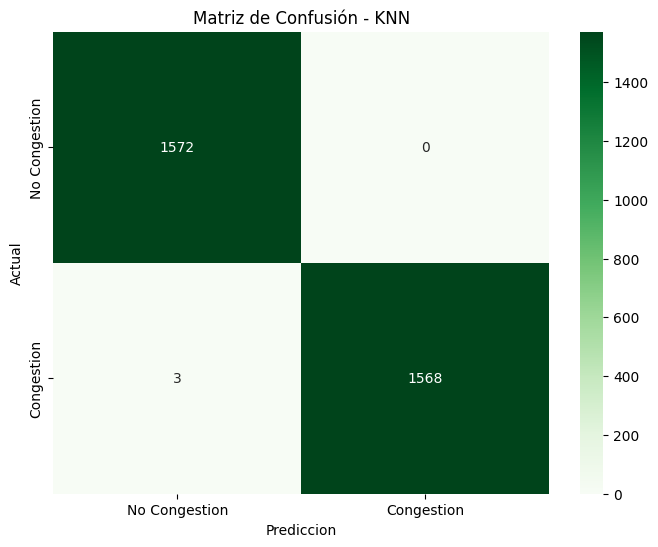

In [ ]:
evaluar_knn(modelo_knn, X_test, y_test)d

*Comparativa con modelo implementando regresion logistica*

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV

def train_logistic_with_gridsearch(X_train, y_train):
    """
    Busca los mejores hiperpar√°metros usando GridSearchCV y entrena el mejor modelo.
    """
    param_grid = {
        'C': [0.01, 0.1, 1, 10],
        'max_iter': [100, 300, 500, 1000],
        'class_weight': [None, 'balanced'],
        'solver': ['lbfgs']
    }

    grid = GridSearchCV(
        LogisticRegression(),
        param_grid,
        cv=5,  # validaci√≥n cruzada con 5 folds
        scoring='accuracy',
        verbose=1,
        n_jobs=-1
    )
    grid.fit(X_train, y_train)
    print("Mejor combinaci√≥n encontrada:", grid.best_params_)
    print("Mejor accuracy promedio (CV):", grid.best_score_)
    return grid.best_estimator_

def train_logistic_model(X_train,y_train, use_grid_search=True):
    """
    Entrena un modelo de regresi√≥n log√≠stica binaria, con opci√≥n a optimizaci√≥n por GridSearch.
    """
    if use_grid_search:
        model = train_logistic_with_gridsearch(X_train, y_train)
    else:
        model = LogisticRegression(max_iter=1000, class_weight='balanced')
        model.fit(X_train, y_train)

    return model

def evaluate_model(model, X_test, y_test):
    """
    Eval√∫a un modelo entrenado de clasificaci√≥n binaria.
    Imprime accuracy, matriz de confusi√≥n y reporte de clasificaci√≥n.
    """
    y_pred = model.predict(X_test)

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nReporte de Clasificaci√≥n:\n", classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',
                xticklabels=['Sin Congesti√≥n', 'Congesti√≥n'],
                yticklabels=['Sin Congesti√≥n', 'Congesti√≥n'])
    plt.xlabel("Predicci√≥n")
    plt.ylabel("Real")
    plt.title("Matriz de Confusi√≥n - Regresi√≥n Log√≠stica")
    plt.show()




Fitting 5 folds for each of 32 candidates, totalling 160 fits
‚úÖ Mejor combinaci√≥n encontrada: {'C': 0.1, 'class_weight': None, 'max_iter': 100, 'solver': 'lbfgs'}
üìà Mejor accuracy promedio (CV): 0.9823361163160792
üîé Accuracy: 0.9825007954183901

üìä Reporte de Clasificaci√≥n:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1572
           1       0.98      0.98      0.98      1571

    accuracy                           0.98      3143
   macro avg       0.98      0.98      0.98      3143
weighted avg       0.98      0.98      0.98      3143



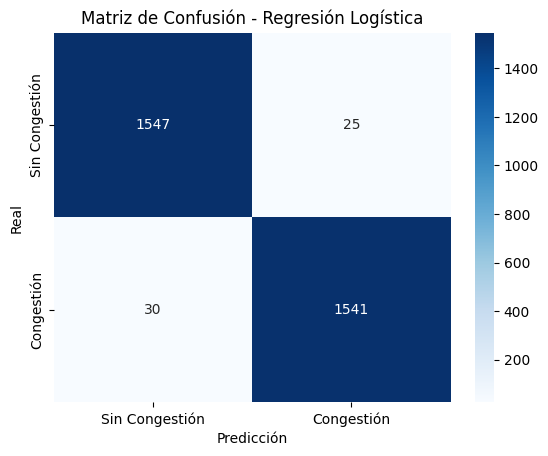

In [ ]:
# Entrenamiento y evaluaci√≥n de XGBoost
modelo_rl=train_logistic_model(X_train, y_train)
evaluate_model(modelo_rl, X_test, y_test)

Accuracy: 0.9825007954183901

Reporte de Clasificaci√≥n:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1572
           1       0.98      0.98      0.98      1571

    accuracy                           0.98      3143
   macro avg       0.98      0.98      0.98      3143
weighted avg       0.98      0.98      0.98      3143



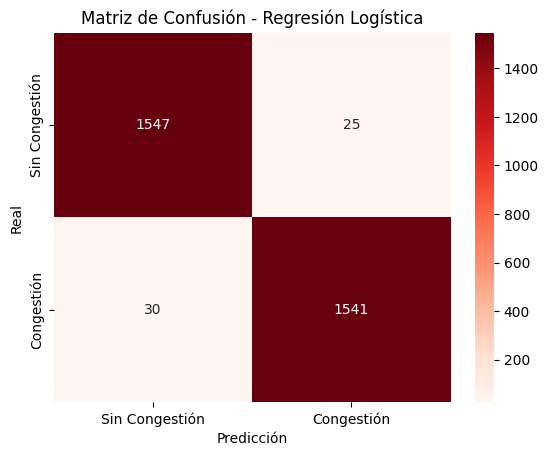

In [ ]:
evaluate_model(modelo_rl, X_test, y_test)

***Exportar Modelos***

In [ ]:
import pickle
import joblib


from google.colab import files
# Supongamos que 'model' es tu modelo entrenado
with open('modelo_rf.pkl', 'wb') as f:
  pickle.dump(modelo, f)
files.download('modelo_rf.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

# Guardar el escalador entrenado en un archivo
joblib.dump(scaler, "scaler.pkl")

# Descargar el archivo .pkl

files.download('scaler.pkl')

In [ ]:
from google.colab import files
# Supongamos que 'model' es tu modelo entrenado
with open('modelo_knn.pkl', 'wb') as f:
  pickle.dump(modelo_knn, f)
files.download('modelo_knn.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
# Supongamos que 'model' es tu modelo entrenado
with open('modelo_rl.pkl', 'wb') as f:
  pickle.dump(modelo_rl, f)
files.download('modelo_rl.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import sklearn
print(f"Versi√≥n actual de scikit-learn: {sklearn.__version__}")

Versi√≥n actual de scikit-learn: 1.3.2


In [ ]:
print(f"N√∫mero de caracter√≠sticas esperadas por el modelo: {modelo.n_features_in_}")
import joblib
import sklearn
print(f"Versi√≥n de scikit-learn utilizada en el modelo: {modelo.__getstate__()['_sklearn_version']}")



N√∫mero de caracter√≠sticas esperadas por el modelo: 4
Versi√≥n de scikit-learn utilizada en el modelo: 1.3.2
